<a href="https://colab.research.google.com/github/nekobuta109/pub/blob/main/robot_inv_kinetic_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math

#======================================================================================================
#     const vals
#======================================================================================================
_l1 = 290
_l2 = 290
_l3 = 135

#	DFD6755 	DFD6561 	DFD6342
#アーム1 	290 	220 	140
#アーム2 	290 	220 	140
#アーム3 	135 	140 	150

#======================================================================================================
#     sub routines
#======================================================================================================
def _a(y,th):
  a = y - (_l3*math.sin(math.radians(th)))
  return a

def _b(x,th):
  b = x - (_l3*math.cos(math.radians(th)))
  return b

def _c(x,y,th):
  a = _a(y,th)
  b = _b(x,th)
  c = ((a**2) + (b**2) + (_l1**2) - (_l2**2)) / (2*_l1)
  return c
def _d(x,y,th):
  a = _a(y,th)
  b = _b(x,th)
  d = ((a**2) + (b**2) - (_l1**2) + (_l2**2))/ (2*_l2)
  return d

#===========================================================
#   順運動公式
#===========================================================
def _arm1(q1):
  p = [ _l1 * math.cos(q1) ,  _l1 * math.sin(q1) ]
  return p
def _arm2(q1,q2):
  arm1 = _arm1(q1)
  p = [ arm1[0] + (_l2*math.cos(q1+q2)) , arm1[1]+(_l2 * math.sin(q1+q2)) ]
  return p
def _arm3(q1,q2,q3):
  arm2 = _arm2(q1,q2)
  p = [ arm2[0] + (_l3*math.cos(q1+q2+q3)) , arm2[1] + (_l3*math.sin(q1+q2+q3)) ]
  return p

a[65.0] / b[200.0] / c[76.25] / d[76.25] phy[0.3142318990843383]
[2.3995193448495034, -2.3995193448495034]
q1[-0.8855277733404134] / q2[2.3995193448495034] / q3[0.05680475528580664
q1[-50.73700405402307] / q2[137.48233131987288] / q3[3.254672734150175
xy (199.99999999999997,199.99999999999997)  θ:90.0


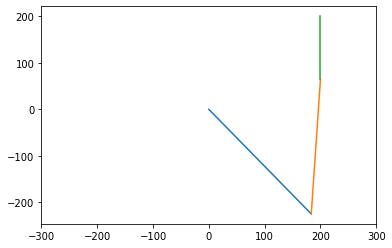

q1[1.51399157150909] / q2[-2.3995193448495034] / q3[2.45632410013531
q1[86.74532726584982] / q2[-137.48233131987288] / q3[140.7370040540231
xy (199.99999999999994,199.99999999999997)  θ:90.00000000000001


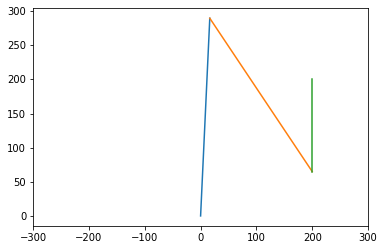

In [ ]:
#目的の座標です。
x = 200
y = 200
th = 90     #アーム３の姿勢です。

a = _a(y,th)    #リンク2までの
b = _b(x,th)
c = _c(x,y,th)
d = _d(x,y,th)


#====================================================
#     φ
#====================================================
phy = math.atan2(a,b)
print('a['+str(a)+'] / b['+str(b)+'] / c['+str(c)+'] / d[' + str(d) + '] phy[' + str(phy)+ ']' );

#====================================================
#     θ1
#====================================================
_sub_1 =math.atan2(math.sqrt((a**2)+(b**2)-(c**2)),c)
q1 = [ phy -_sub_1 , phy + _sub_1 ]   #+-の2種類ある。

#====================================================
#     θ2
#====================================================
#q1 の二パターンにそれぞれ２つの符号がある。
_sub_2  = math.atan2(math.sqrt((a**2)+(b**2)-(d**2)),d)
q2 = [ phy - q1[0] + _sub_2 , phy - q1[1] - _sub_2 ] 
print(q2)

#====================================================
#     θ3
#====================================================
#toku このとき、q1は2個 、 q2は4個 解がある
rad = math.radians(th)
q3 = [ rad - (q1[0]+q2[0])  , rad - (q1[1]+q2[1]) ]

import matplotlib.pyplot as plt
#plt.xlim(-200,150)
# (0,4)から(6,9)まで直線を引く
# ax.plot([0, 6], [4, 9], color = "sienna")
#アーム1までの直線です。
for i in range(2):
  plt.xlim(-300,300)
  _q1 = q1[i]
  _q2 = q2[i]
  _q3 = q3[i]
  arm = [ _arm1(_q1) , _arm2(_q1,_q2) , _arm3(_q1,_q2,_q3) ]

  print('q1['+str(_q1)+'] / q2['+str(_q2)+'] / q3['+str(_q3))
  print('q1['+str(math.degrees(_q1))+'] / q2['+str(math.degrees(_q2))+'] / q3['+str(math.degrees(_q3)))
  print('xy (' + str(arm[2][0]) + ',' + str(arm[2][1]) + ')  θ:' + str(math.degrees(_q1+_q2+_q3)) )

  plt.plot( [ 0         , arm[0][0] ] , [ 0         , arm[0][1] ] )
  plt.plot( [ arm[0][0] , arm[1][0] ] , [ arm[0][1] , arm[1][1] ] )
  plt.plot( [ arm[1][0] , arm[2][0] ] , [ arm[1][1] , arm[2][1] ] )
  plt.show()


10枚のブレードが 90 °の位置を１枚目として均等にならんでいる。

円の中心を(0,0)として、各ブレードの位置は、
<Br>
y = r sinθ<br>
x = r cosθ


In [ ]:
b_r = 100 #ブレードの位置を
for t in range(90,-270,-36):
  rad = np.radians(t);
  print(str(t) +':'+ str(rad))
  x = b_r * np.cos(rad);
  y = b_r * np.sin(rad);
  print('(' + str(int(x)) + ',' + str(int(y)) + ')');



90:1.5707963267948966
(0,100)
54:0.9424777960769379
(58,80)
18:0.3141592653589793
(95,30)
-18:-0.3141592653589793
(95,-30)
-54:-0.9424777960769379
(58,-80)
-90:-1.5707963267948966
(0,-100)
-126:-2.199114857512855
(-58,-80)
-162:-2.827433388230814
(-95,-30)
-198:-3.4557519189487724
(-95,30)
-234:-4.084070449666731
(-58,80)
